In [1]:
import matplotlib.pyplot as plt
import os, pickle
import pandas as pd
import numpy as np
import seaborn as sns

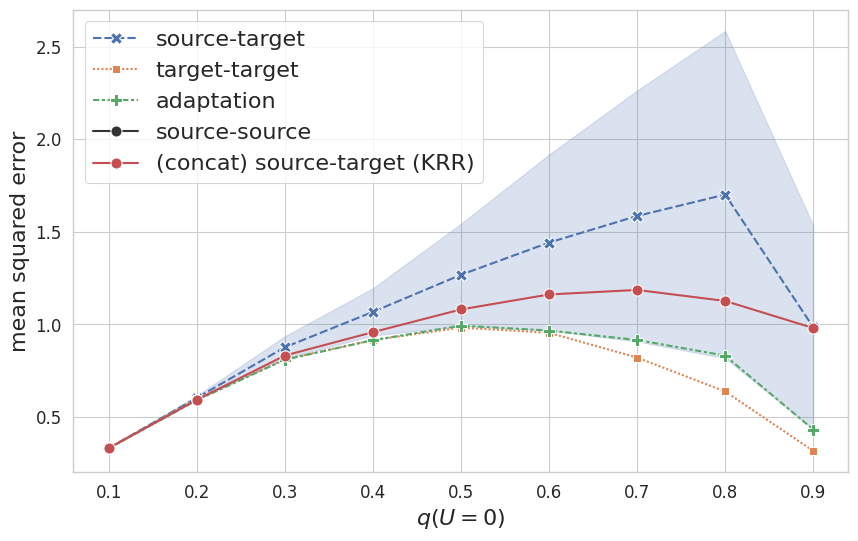

In [18]:
baseline = pd.read_csv('sweep_baseline_v2_v3.csv')
proposed = pd.read_csv('sweep_proposed_v2_fixscale_v3.csv')
baseline['approach'] = '(concat) source-target (KRR)'

sns.set(style="whitegrid")
sns.set_context("paper", rc={"lines.linewidth": 1.5})

# Create the line plot with error bars
plt.figure(figsize=(10, 6))


g = sns.lineplot(data=proposed.sort_values(by=['pU=0']), x='pU=0', y='predict error.l2', hue='task',
            hue_order=['source-target', 'target-target', 'adaptation'], style='task',
             markers=True, markersize=8)

sns.lineplot(data=baseline.sort_values(by=['pU=0']), x='pU=0', y='source -> target', hue='approach',
            hue_order=['(concat) source-target (KRR)'], style='approach', palette=['r'],
             markers=True, markersize=8)


plt.xlabel(r"$q(U=0)$", fontsize=16)
plt.ylabel('mean squared error', fontsize=16)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='upper left', fontsize=16)

plt.savefig('result_sim2.png')

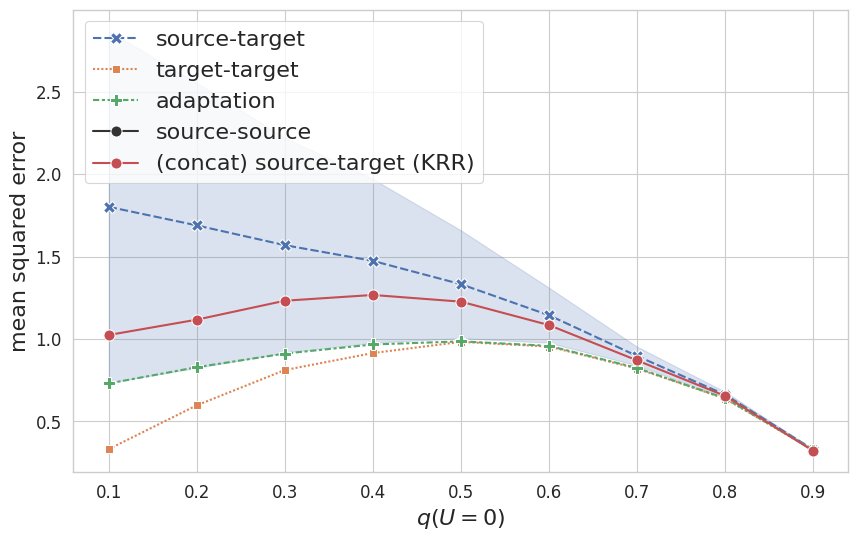

In [19]:
baseline = pd.read_csv('sweep_baseline_v2_v3_reversed.csv')
proposed = pd.read_csv('sweep_proposed_v2_reversed_fixscale_v3.csv')
baseline['approach'] = '(concat) source-target (KRR)'


sns.set(style="whitegrid")
sns.set_context("paper", rc={"lines.linewidth": 1.5})

# Create the line plot with error bars
plt.figure(figsize=(10, 6))


g = sns.lineplot(data=proposed.sort_values(by=['pU=0']), x='pU=0', y='predict error.l2', hue='task',
            hue_order=['source-target', 'target-target', 'adaptation'], style='task',
             markers=True, markersize=8)

sns.lineplot(data=baseline.sort_values(by=['pU=0']), x='pU=0', y='source -> target', hue='approach',
            hue_order=['(concat) source-target (KRR)'], style='approach', palette=['r'],
             markers=True, markersize=8)


plt.xlabel(r"$q(U=0)$", fontsize=16)
plt.ylabel('mean squared error', fontsize=16)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='upper left', fontsize=16)
plt.savefig('result_sim2_reverse.png')